In [ ]:
! pip install -q kaggle
from google.colab import files

files.upload()

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/



mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle competitions download -c 'aptos2019-blindness-detection'

100% 8.01G/8.01G [01:00<00:00, 182MB/s]
100% 8.01G/8.01G [01:00<00:00, 142MB/s]
100% 1.50G/1.50G [00:16<00:00, 164MB/s]

  0% 0.00/53.7k [00:00<?, ?B/s]
100% 53.7k/53.7k [00:00<00:00, 48.3MB/s]
  0% 0.00/24.5k [00:00<?, ?B/s]
100% 24.5k/24.5k [00:00<00:00, 24.1MB/s]
  0% 0.00/28.3k [00:00<?, ?B/s]
100% 28.3k/28.3k [00:00<00:00, 28.0MB/s]


In [ ]:
! mkdir train

In [ ]:
! unzip train_images.zip -d train

Archive:  train_images.zip
  inflating: train/7b9d519cbd66.png  
  inflating: train/ae49cc60f251.png  
  inflating: train/b294927b14b0.png  
  inflating: train/f4d3777f2710.png  
  inflating: train/d74ccc796517.png  
  inflating: train/15bed5adde74.png  
  inflating: train/f002ce614c59.png  
  inflating: train/7335a2d43ada.png  
  inflating: train/9b7b6e4db1d5.png  
  inflating: train/1968183f0e61.png  
  inflating: train/d91273efb92a.png  
  inflating: train/5cf9127f251a.png  
  inflating: train/370f575adb23.png  
  inflating: train/4c17e85686f0.png  
  inflating: train/4f7755e74a9e.png  
  inflating: train/25e9fd872182.png  
  inflating: train/b64e1eef3d63.png  
  inflating: train/e7d2c2c3b30f.png  
  inflating: train/bfda2fd0533a.png  
  inflating: train/224bb938e2dd.png  
  inflating: train/d51e5d7484ea.png  
  inflating: train/dc6fa1b38b83.png  
  inflating: train/74898f372d2b.png  
  inflating: train/152db3de8120.png  
  inflating: train/07929d32b5b3.png  
  inflating: train/0773

In [ ]:
from numpy.random import seed
seed(2)
from tensorflow import set_random_seed
set_random_seed(2)
from tensorflow import keras
from keras import layers
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D,AveragePooling2D
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator




Using TensorFlow backend.


In [ ]:
print(keras.__version__)

2.2.4-tf


In [ ]:
import copy
import random
import cv2
from keras.applications import DenseNet121
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import SGD
from keras.utils import to_categorical
import numpy as np


In [ ]:
from keras.callbacks import History
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.datasets import cifar10
from keras.engine import training
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Activation, Average
from keras.losses import categorical_crossentropy
from keras.models import Model, Input
from keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.python.framework.ops import Tensor
from typing import Tuple, List
import glob
import numpy as np
import os

In [ ]:
import os
blnd_img=list()
for file in os.listdir("/content/train"):
    #if file.endswith(".jpg"):
      #print(1)

        #print(os.path.join('/content/jpg', file))
        img=blnd_img.append(os.path.join("/content/train",file))
        #print(blnd_img)
blnd_df = pd.DataFrame(blnd_img)
blnd_df['colFromIndex'] = blnd_df.index
blnd_df = blnd_df.sort_values([0, 'colFromIndex'])
blnd_df=blnd_df.reset_index()
len(blnd_df)
label_dataframe = pd.read_csv('/content/train.csv')
label_dataframe.head()



,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [ ]:
#from keras.preprocessing.image import img_to_array
i=0
import cv2
import numpy as np
while i<len(blnd_df[0]):
  a=cv2.imread(blnd_df[0][i])
  a=cv2.resize(a,(256,256))
  #a=img_to_array(a)
  #a=np.expand_dims(a,axis=0) 
  #a=a[np.newaxis,:,:]
  #a = a.reshape((1,) + a.shape)
  blnd_df[0][i]=a
  print(i)
  i+=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
def crop_image1(img,tol=7):
    # img is image data
    # tol  is tolerance
        
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]

def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
            img = np.stack([img1,img2,img3],axis=-1)
        return img

def preprocess_image(image_path, desired_size=224):
    img = cv2.cvtColor(image_path, cv2.COLOR_BGR2RGB)
    img = crop_image_from_gray(image_path)
    img = cv2.resize(image_path, (desired_size,desired_size))
    img = cv2.addWeighted(image_path,4,cv2.GaussianBlur(image_path, (0,0), desired_size/30) ,-4 ,128)
    
    return img


In [ ]:
i=0
while i<len(blnd_df[0]):
  a=preprocess_image(blnd_df[0][i],224)
  blnd_df[0][i]=a
  print(i)
  i+=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
while i<len(blnd_df[0]):
  a = cv2.cvtColor(blnd_df[0][i], cv2.COLOR_BGR2RGB)
  blnd_df[0][i]=a
  print(i)
  i+=1

In [ ]:
while i<len(blnd_df[0]):
  a=minimum_filter(blnd_df[0][i], mode='nearest' )
  blnd_df[0][i]=a
  print(i)
  i+=1

In [ ]:
blnd_df[1]=label_dataframe['id_code']
blnd_df[2]=label_dataframe['diagnosis']
print(blnd_df.head(5))
print(blnd_df.tail(5))

   index                                                  0  ...             1  2
0   1135  [[[132, 128, 132], [132, 128, 132], [132, 128,...  ...  000c1434d8d7  2
1   2374  [[[128, 128, 128], [124, 124, 124], [124, 124,...  ...  001639a390f0  4
2    262  [[[128, 128, 128], [128, 128, 128], [128, 128,...  ...  0024cdab0c1e  1
3   3145  [[[128, 128, 124], [128, 128, 124], [128, 128,...  ...  002c21358ce6  0
4   1886  [[[128, 128, 128], [128, 128, 128], [128, 128,...  ...  005b95c28852  0

[5 rows x 5 columns]
      index                                                  0  ...             1  2
3657   2158  [[[124, 124, 124], [128, 128, 128], [128, 128,...  ...  ffa47f6a7bf4  2
3658    860  [[[128, 128, 128], [128, 128, 128], [128, 128,...  ...  ffc04fed30e6  0
3659   1233  [[[128, 128, 128], [128, 128, 128], [128, 128,...  ...  ffcf7b45f213  2
3660   3352  [[[124, 128, 128], [124, 128, 128], [132, 140,...  ...  ffd97f8cd5aa  0
3661   2256  [[[128, 128, 128], [128, 124, 132], [128, 128,..

In [ ]:
from sklearn.model_selection import train_test_split #  train,test = train_test_split(dataset,test_size=0.20,stratify=True)
train_img_blnd, test_img_blnd, train_label_blnd, test_label_blnd = train_test_split(blnd_df[0], blnd_df[2], test_size=0.2,stratify=blnd_df[2])
train=np.save('/content/train', np.stack(train_img_blnd,axis=0))
test=np.save('/content/test', np.stack(test_img_blnd,axis=0))

In [ ]:
train_img_blnd=np.load('/content/train.npy')
test_img_blnd = np.load('/content/test.npy')
train_img_blnd.shape

(2929, 256, 256, 3)

In [ ]:
train_img_blnd=train_img_blnd.astype('float32')/255
test_img_blnd=test_img_blnd.astype('float32')/255

In [ ]:
train_label_blnd=train_label_blnd.astype('category')
dummies_train= pd.get_dummies(train_label_blnd)
dummies_train.head()
test_label_blnd=test_label_blnd.astype('category')
dummies_test= pd.get_dummies(test_label_blnd)
dummies_test.head()

,0,1,2,3,4
2254,0,1,0,0,0
1124,0,1,0,0,0
3023,0,0,1,0,0
1594,0,0,0,0,1
363,1,0,0,0,0


In [ ]:
from google.colab import files

files.upload()

Saving DenseNet-BC-121-32-no-top.h5 to DenseNet-BC-121-32-no-top.h5


In [ ]:
densenet = DenseNet121(
    weights='/content/DenseNet-BC-121-32-no-top.h5',
    include_top=False,
    input_shape=(256,256,3)
)

W0804 01:26:46.199053 140131159078784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 01:26:46.200850 140131159078784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 01:26:46.249409 140131159078784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0804 01:26:46.304235 140131159078784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0804 01:26:46.305522 1401311590

In [ ]:
 from keras.optimizers import Adam
 model = Sequential()
 model.add(densenet)
 model.add(layers.GlobalAveragePooling2D())
 model.add(layers.Dropout(0.5))
 model.add(layers.Dense(5, activation='sigmoid'))
    
 model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(lr=0.0001,decay=1e-6),
        metrics=['accuracy'])

W0804 01:27:26.731237 140131159078784 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0804 01:27:26.773841 140131159078784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 8, 8, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5125      
Total params: 7,042,629
Trainable params: 6,958,981
Non-trainable params: 83,648
_________________________________________________________________


In [ ]:
history_densenet=  model.fit(train_img_blnd, dummies_train, batch_size=32,
                validation_data= (test_img_blnd,dummies_test),epochs=10)

Train on 2929 samples, validate on 733 samples
Epoch 1/10
2929/2929 [==============================] - 55s 19ms/step - loss: 0.1913 - acc: 0.9273 - val_loss: 0.6973 - val_acc: 0.7967
Epoch 2/10
2929/2929 [==============================] - 54s 18ms/step - loss: 0.1471 - acc: 0.9498 - val_loss: 0.6452 - val_acc: 0.8213
Epoch 3/10
2929/2929 [==============================] - 54s 18ms/step - loss: 0.1057 - acc: 0.9635 - val_loss: 0.7050 - val_acc: 0.8104
Epoch 4/10
2929/2929 [==============================] - 54s 18ms/step - loss: 0.0805 - acc: 0.9693 - val_loss: 1.0632 - val_acc: 0.7776
Epoch 5/10
2929/2929 [==============================] - 54s 18ms/step - loss: 0.0810 - acc: 0.9730 - val_loss: 0.7506 - val_acc: 0.8295
Epoch 6/10
2929/2929 [==============================] - 54s 18ms/step - loss: 0.0570 - acc: 0.9802 - val_loss: 0.7713 - val_acc: 0.8240
Epoch 7/10
2929/2929 [==============================] - 54s 18ms/step - loss: 0.0485 - acc: 0.9826 - val_loss: 0.7969 - val_acc: 0.8076
E

In [ ]:
print(max(history_densenet.history["acc"]))
print(max(history_densenet.history["val_acc"]))

0.9849778081256402
0.829467940297979


In [ ]:
from sklearn.metrics import classification_report
import numpy as np
y_proba = model.predict(test_img_blnd)
y_classes = y_proba.argmax(axis=-1)
#y_classes = keras.np_utils.probas_to_classes(y_proba)
y_classes

array([1, 1, 4, 4, 0, 0, 0, 2, 2, 1, 0, 4, 3, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 3, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 4, 3, 0,
       0, 2, 0, 4, 0, 1, 2, 2, 4, 2, 4, 2, 2, 4, 0, 4, 0, 3, 2, 1, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0,
       2, 2, 0, 0, 2, 2, 3, 0, 2, 4, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0,
       0, 2, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 3, 0, 2, 0, 1, 0, 1, 1, 0, 2, 0, 0,
       0, 2, 0, 0, 4, 0, 1, 2, 3, 2, 0, 2, 1, 2, 0, 4, 0, 2, 4, 2, 0, 2,
       0, 2, 2, 2, 2, 4, 4, 4, 3, 0, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1,
       0, 4, 0, 0, 2, 2, 2, 0, 4, 1, 0, 2, 0, 0, 4, 0, 4, 4, 4, 3, 0, 0,
       0, 1, 0, 0, 0, 2, 0, 0, 4, 2, 0, 0, 4, 2, 0, 4, 1, 0, 2, 0, 1, 4,
       0, 0, 0, 2, 0, 2, 0, 2, 4, 3, 4, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2,
       1, 2, 2, 0, 2, 0, 0, 0, 3, 1, 0, 3, 4, 2, 0,

In [ ]:
from mlxtend.evaluate import confusion_matrix
cm = confusion_matrix(y_target=test_label_blnd,
                      y_predicted=y_classes,
binary=False)
cm

array([[356,   4,   1,   0,   0],
       [  3,  55,  13,   0,   3],
       [  1,  24, 144,  13,  18],
       [  0,   0,  14,  13,  12],
       [  0,   5,  14,   9,  31]])

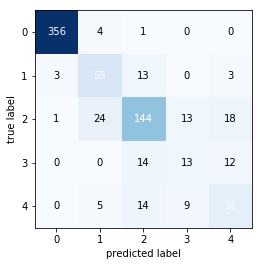

TypeError: ignored

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()
plot_confusion_matrix(conf_mat=cm,
                      title='Normalized confusion matrix')

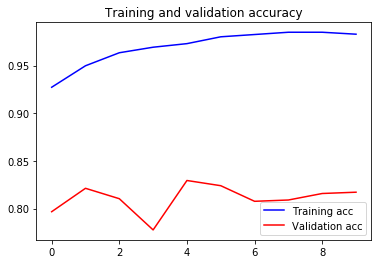

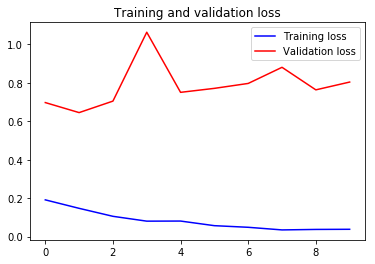

In [ ]:
acc = history_densenet.history['acc']
val_acc = history_densenet.history['val_acc']
loss = history_densenet.history['loss']
val_loss = history_densenet.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()